In this task, I am going to use neural network to build model to predict the charges of medical based on set of features for the patients. Also I will examine the difference between two methods for normalizing the data. These methods are Standard Scaler anf MinMax Scaler.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

**Insurance** dataset

In [2]:
url = 'https://raw.githubusercontent.com/krish1407/Medical-Cost-Personal-Datasets/master/insurance.csv'

In [3]:
# read the dataset into pandas

insurance = pd.read_csv(url)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Features**:

**age**: age of primary beneficiary

**sex**: insurance contractor gender, female, male

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: Number of children covered by health insurance / Number of dependents

**smoker**: Smoking

**region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges**: Individual medical costs billed by health insurance

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Check null values

insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Check the data type of arributes
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Check the distribution of numerical features

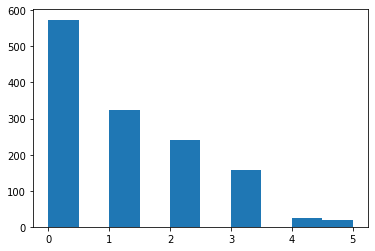

In [58]:
plt.hist(insurance['children'])
plt.show()

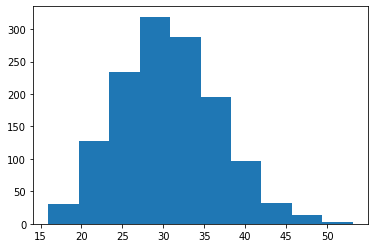

In [59]:
plt.hist(insurance['bmi'])
plt.show()

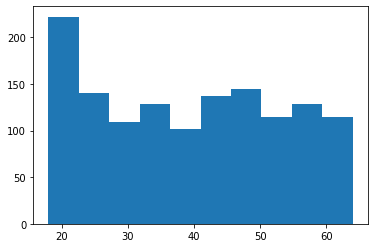

In [60]:
plt.hist(insurance['age'])
plt.show()

In [62]:
# Split the data into X and y
X = insurance.drop(['charges'], axis =1)
y = insurance['charges']


**Preprocessing** (Normalization and standardization)

We are going to try two different methods for scaling. These are MinMax scaler and Standard Scaler

**1. Using Standard Scaler**

In [73]:
# Scale the numerical features using Min Max Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

ct = make_column_transformer((StandardScaler(),['age', 'bmi','children'] ),
                             (OneHotEncoder(), ['smoker', 'region', 'sex'])
                             )
insurance_standard_scaled = ct.fit_transform(X)

insurance_standard_scaled[0]

array([-1.43876426, -0.45332   , -0.90861367,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ])

In [74]:
# Split the date into train, test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(insurance_standard_scaled,y,test_size = .2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

**Build Model**

In [75]:
# Create the model
insurance_model1 = tf.keras.Sequential([
              tf.keras.layers.Dense(100, activation='relu', input_shape = (11,)),
              tf.keras.layers.Dense(10, activation='relu'),
              tf.keras.layers.Dense(1)

              

] )

# Compile the model
insurance_model1.compile(loss=tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                         metrics=['mae']
                         )


In [76]:
ealy_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# train the model
history = insurance_model1.fit(X_train,y_train, validation_data=[X_test,y_test],callbacks=[ealy_stopping] ,verbose = 1, epochs = 1000)



Epoch 1/1000
34/34 [==============================] - 1s 6ms/step - loss: 13344.8047 - mae: 13344.8047 - val_loss: 12965.3750 - val_mae: 12965.3750
Epoch 2/1000
34/34 [==============================] - 0s 3ms/step - loss: 13340.4424 - mae: 13340.4424 - val_loss: 12958.5791 - val_mae: 12958.5791
Epoch 3/1000
34/34 [==============================] - 0s 3ms/step - loss: 13330.0244 - mae: 13330.0244 - val_loss: 12943.1377 - val_mae: 12943.1377
Epoch 4/1000
34/34 [==============================] - 0s 3ms/step - loss: 13308.0371 - mae: 13308.0371 - val_loss: 12912.7441 - val_mae: 12912.7441
Epoch 5/1000
34/34 [==============================] - 0s 4ms/step - loss: 13268.1182 - mae: 13268.1182 - val_loss: 12861.2539 - val_mae: 12861.2539
Epoch 6/1000
34/34 [==============================] - 0s 3ms/step - loss: 13204.3223 - mae: 13204.3223 - val_loss: 12782.9854 - val_mae: 12782.9854
Epoch 7/1000
34/34 [==============================] - 0s 3ms/step - loss: 13111.0957 - mae: 13111.0957 - val_los

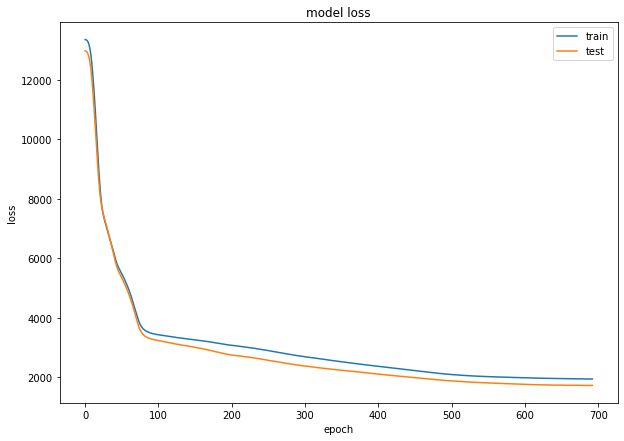

In [77]:
# summarize history for loss
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


**2. Using MinMax Scaler**




In [80]:
# Scale the numerical features using Min Max Scaler

ct = make_column_transformer((MinMaxScaler(),['age', 'bmi','children'] ),
                             (OneHotEncoder(), ['smoker', 'region', 'sex'])
                             )
insurance_minmax_scaled = ct.fit_transform(X)

insurance_minmax_scaled[0]

array([0.02173913, 0.3212268 , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        ])

In [81]:
# Split the date into train, test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(insurance_minmax_scaled,y,test_size = .2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

**Build the Model**

In [82]:
# Create the model
insurance_model1 = tf.keras.Sequential([
              tf.keras.layers.Dense(100, activation='relu', input_shape = (11,)),
              tf.keras.layers.Dense(10, activation='relu'),
              tf.keras.layers.Dense(1)

              

] )

# Compile the model
insurance_model1.compile(loss=tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                         metrics=['mae']
                         )


In [83]:
ealy_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# train the model
history = insurance_model1.fit(X_train,y_train, validation_data=[X_test,y_test],callbacks=[ealy_stopping] ,verbose = 1, epochs = 1000)



Epoch 1/1000
34/34 [==============================] - 1s 7ms/step - loss: 13345.4658 - mae: 13345.4658 - val_loss: 12966.6357 - val_mae: 12966.6357
Epoch 2/1000
34/34 [==============================] - 0s 3ms/step - loss: 13342.7061 - mae: 13342.7061 - val_loss: 12962.4463 - val_mae: 12962.4463
Epoch 3/1000
34/34 [==============================] - 0s 4ms/step - loss: 13336.0508 - mae: 13336.0508 - val_loss: 12952.4268 - val_mae: 12952.4268
Epoch 4/1000
34/34 [==============================] - 0s 3ms/step - loss: 13321.6934 - mae: 13321.6934 - val_loss: 12932.6582 - val_mae: 12932.6582
Epoch 5/1000
34/34 [==============================] - 0s 3ms/step - loss: 13295.6250 - mae: 13295.6250 - val_loss: 12899.2734 - val_mae: 12899.2734
Epoch 6/1000
34/34 [==============================] - 0s 3ms/step - loss: 13254.4180 - mae: 13254.4180 - val_loss: 12849.1260 - val_mae: 12849.1260
Epoch 7/1000
34/34 [==============================] - 0s 3ms/step - loss: 13194.6797 - mae: 13194.6797 - val_los

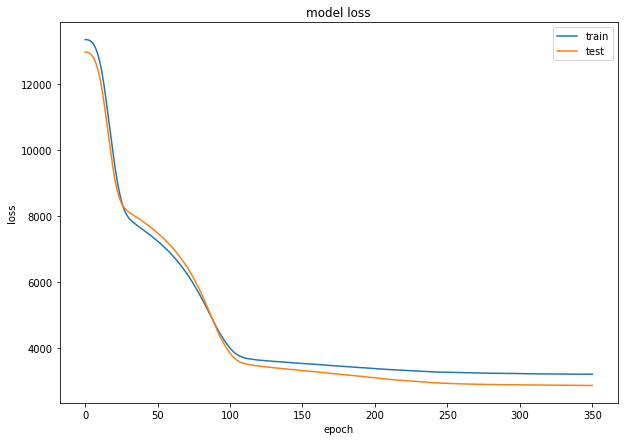

In [84]:
# summarize history for loss
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

The experiment has shown that the performance of neural network models work better with data normalised by MinMax Scaler than data using standard scaler